In [1]:
import pandas as pd
from plotnine import *
import numpy as np
import multiprocessing
from adjustText import adjust_text

# Figure 4: Archaelogical samples

## Fig 4A: Dog vs Human endogenous DNA source classification

In [2]:
endo_human = 1.247484
endo_dog = 0.106391

In [3]:
bp_non_udg = "../../data/coproid_logratio/coproID_bp_non_udg.csv"
bp_udg_half = "../../data/coproid_logratio/coproID_bp_udg_half.csv"

In [4]:
d_non_udg = pd.read_csv(bp_non_udg, index_col=0)
d_udg_half = pd.read_csv(bp_udg_half, index_col=0)

In [5]:
d = d_non_udg.append(d_udg_half)

In [6]:
d.head()

,Organism_name1,Organism_name2,Genome1_size,Genome2_size,nb_bp_aligned_genome1,nb_bp_aligned_genome2,nb_ancient_bp_aligned_genome1,nb_ancient_bp_aligned_genome2,normalized_nb_ancient_bp_aligned_genome1,normalized_nb_ancient_bp_aligned_genome2,NormalizedReadRatio_1,NormalizedReadRatio_2
Sample_name,,,,,,,,,,,,
ZSM002,Homo_sapiens,Canis_familiaris,3099922541,2327650711,57134,44159957,36816,1297022,0.000119,0.055722,0.002127,0.997873
ZSM005,Homo_sapiens,Canis_familiaris,3099922541,2327650711,7949047,35535,650076,7231,0.002097,0.000311,0.870960,0.129040
ZSM023,Homo_sapiens,Canis_familiaris,3099922541,2327650711,41783,2887350,1512,62069,0.000005,0.002667,0.001827,0.998173
ZSM025,Homo_sapiens,Canis_familiaris,3099922541,2327650711,42619002,8339,717319,30425,0.002314,0.001307,0.639022,0.360978
ZSM027,Homo_sapiens,Canis_familiaris,3099922541,2327650711,9465837,6575,127210,8147,0.000410,0.000350,0.539659,0.460341


In [7]:
d2 = pd.DataFrame()

In [8]:
d2['nnb_bp_aligned_genome1'] = (d['nb_bp_aligned_genome1']/d['Genome1_size'][0])/endo_human
d2['nnb_ancient_bp_aligned_genome1'] = (d['nb_ancient_bp_aligned_genome1']/d['Genome1_size'][0])/endo_human
d2['nnb_bp_aligned_genome2'] = (d['nb_bp_aligned_genome2']/d['Genome2_size'][0])/endo_dog
d2['nnb_ancient_bp_aligned_genome2'] = (d['nb_ancient_bp_aligned_genome2']/d['Genome2_size'][0])/endo_dog

In [9]:
new_index = []
for i in list(d2.index.str.split("_")):
    if len(i) > 1:
        new_index.append("_".join(i[0:2]))
    else:
        new_index.append(i[0])
d2['sample'] = new_index
d2.index = new_index

In [10]:
d2 = d2.filter(regex = "(AHP|ZSM|YRK).*", axis=0)

In [11]:
d2

,nnb_bp_aligned_genome1,nnb_ancient_bp_aligned_genome1,nnb_bp_aligned_genome2,nnb_ancient_bp_aligned_genome2,sample
ZSM002,0.000015,9.520303e-06,0.178322,0.005238,ZSM002
ZSM005,0.002056,1.681041e-04,0.000143,0.000029,ZSM005
ZSM023,0.000011,3.909903e-07,0.011659,0.000251,ZSM023
ZSM025,0.011021,1.854926e-04,0.000034,0.000123,ZSM025
ZSM027,0.002448,3.289542e-05,0.000027,0.000033,ZSM027
ZSM028,0.001029,7.371253e-05,0.001213,0.000072,ZSM028
ZSM029,0.000043,4.761186e-06,0.056121,0.001565,ZSM029
AHP001,0.000022,5.621778e-07,0.003311,0.000372,AHP001
AHP002,0.000074,8.008577e-07,0.009692,0.001094,AHP002
AHP003,0.000094,9.223957e-07,0.012711,0.001625,AHP003


In [12]:
d2['all_orga'] = np.where(d2['nnb_bp_aligned_genome1'] > d2['nnb_bp_aligned_genome2'], 'Homo sapiens', 'Canis familiaris')

In [13]:
d2['ancient_orga'] =  np.where(d2['nnb_ancient_bp_aligned_genome1'] > d2['nnb_ancient_bp_aligned_genome2'], 'Homo sapiens', 'Canis familiaris')

In [14]:
d2['all_log_ratio'] = np.log2(d2['nnb_bp_aligned_genome1']/d2['nnb_bp_aligned_genome2'])
d2['pmd_log_ratio'] = np.log2(d2['nnb_ancient_bp_aligned_genome1']/d2['nnb_ancient_bp_aligned_genome2'])

In [15]:
d2['PMD change'] = np.where((np.sign(d2['all_log_ratio']) != np.sign(d2['pmd_log_ratio'])), 'changed','not changed')

In [16]:
d2['grepel_name'] = np.where(d2['PMD change'] == 'changed',d2.index, None)

In [17]:
d3 = d2['nnb_bp_aligned_genome1'].append(d2['nnb_ancient_bp_aligned_genome1']).to_frame('aligned_human')
d3['aligned_dog'] = d2['nnb_bp_aligned_genome2'].append(d2['nnb_ancient_bp_aligned_genome2'])
d3['al_type']=['None']*d2.shape[0]+['PMD filtered']*d2.shape[0]

In [18]:
d3['sample'] = d3.index

In [19]:
d3.head()

,aligned_human,aligned_dog,al_type,sample
ZSM002,0.000015,0.178322,None,ZSM002
ZSM005,0.002056,0.000143,None,ZSM005
ZSM023,0.000011,0.011659,None,ZSM023
ZSM025,0.011021,0.000034,None,ZSM025
ZSM027,0.002448,0.000027,None,ZSM027


In [20]:
d3['log_ratio'] = np.log2(d3['aligned_human']/d3['aligned_dog'])

In [21]:
d3['organism'] = np.where(d3['log_ratio'] > 0, 'Homo sapiens', 'Canis familiaris')

In [22]:
d4 = d3

In [23]:
d4['log_aligned_human'] = np.log2(d4['aligned_human'])
d4['log_aligned_dog'] = np.log2(d4['aligned_dog'])
d3['grepel_name'] = np.where(d3.al_type == 'None', d3.index, None)
d3['prediction'] = np.where(np.abs(d3.log_aligned_human - d3.log_aligned_dog) < 1, 'Uncertain', d3.organism)
d3['prediction'] = d3['prediction'].str.replace('Homo sapiens','Human').replace('Canis familiaris','Dog')
d3['prediction'] = pd.Categorical(d3.prediction, categories=['Human','Dog','Uncertain'], ordered=True)

In [24]:
uncertain_zone = pd.DataFrame()
uncertain_zone['x'] = [-29,2,0,-31]
uncertain_zone['y'] = [-30,1,1,-30]

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: ./results/figure4A.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/layer.py:453: PlotnineWarning: geom_text : Removed 12 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/layer.py:453: PlotnineWarning: geom_text : Removed 12 rows containing missing

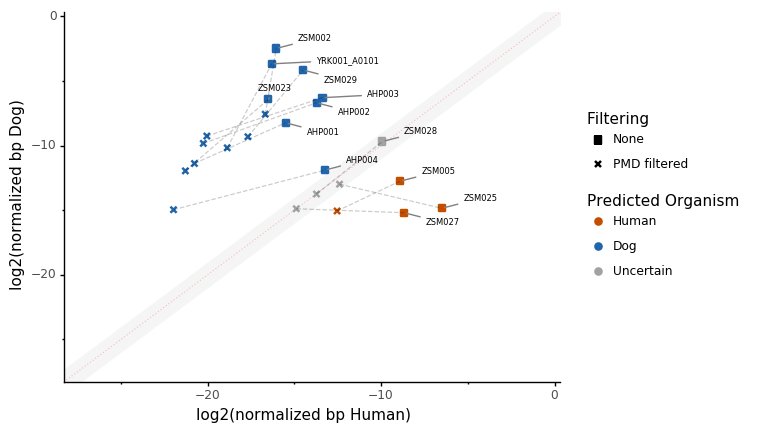

<ggplot: (8738697927926)>

In [25]:
# p = ggplot(data=d3, mapping= aes(x='log_aligned_human', y='log_aligned_dog', label='grepel_name')) + geom_abline(intercept=0, slope=1, color='red', alpha=0.2, linetype='dotted') 
p = ggplot(data=d3, mapping= aes(x='log_aligned_human', y='log_aligned_dog')) 
p = p + geom_polygon(data = uncertain_zone, mapping = aes(x='x',y='y'), fill = '#a2a3a1', alpha=0.1)
p = p + geom_abline(intercept=0, slope=1, color='red', alpha=0.2, linetype='dotted') 
p = p + geom_point(aes(color='prediction', shape='al_type'), stroke=1)
p = p + geom_line(aes(group='sample'), alpha=0.2, linetype='dashed')
p = p + theme_classic()
p = p + geom_text(data = d3, mapping= aes(x='log_aligned_human', y='log_aligned_dog', label = 'grepel_name'), size=6, adjust_text= {
    'expand_points': (2, 2),
    'expand_objects': (1.5, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'grey'
    },
    'on_basemap':True
})

# p = p + geom_text(size=6, nudge_y=0.16, ha='right')
p = p + scale_shape_manual(name='Filtering', values={'None':'s', 'PMD filtered':'x'})
p = p + scale_color_manual(name='Predicted Organism', values = {'Human':'#c44e00', 'Dog':'#2166ac', 'Uncertain':'#a2a3a1'})
p = p + labs(x='log2(normalized bp Human)', y = 'log2(normalized bp Dog)')
p = p + coord_cartesian(xlim=[-27,-1],ylim=[-27,-1])
p.save("./results/figure4A.png", dpi=300)
p

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: ./results/figure4A_supplementary.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)


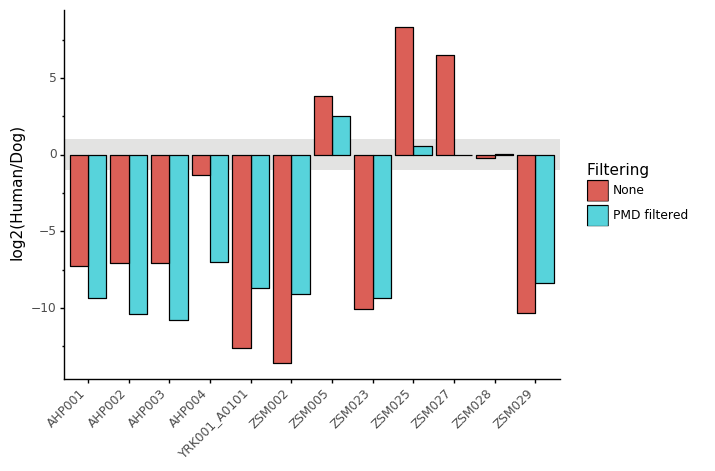

<ggplot: (8738697946088)>

In [26]:
p = ggplot(d3, aes(x='sample', y='log_ratio'))
p = p + geom_rect(ymin=-1,ymax=1, fill='#a2a3a1', xmin=0,xmax=30, alpha=0.01)
p = p + geom_bar(aes(fill='al_type'), stat='identity', position = 'dodge', color = 'black')
p = p + theme_classic() + theme(axis_text_x=element_text(angle=45, hjust=1)) + scale_fill_discrete(name='Filtering')
p = p + labs(x='',y='log2(Human/Dog)')
p.save("./results/figure4A_supplementary.png", dpi=300)
p

## Fig 4b: t-SNE embedding with archaelogical samples

In [107]:
s = "../../data/sourcepredict/sourcepredict_embedding.csv"
s_pred = "../../data/sourcepredict/prediction.sourcepredict.csv"

In [108]:
sp = pd.read_csv(s, index_col=0)

In [109]:
spp = pd.read_csv(s_pred, index_col=0).T

In [110]:
conditions = [(spp['Canis_familiaris'] > 0.5) ,
              (spp['Homo_sapiens'] > 0.5),
              (spp['Soil'] > 0.5),
              (spp['unknown'] > 0.5)
             ]
choices = ['Canis familiaris', 'Homo sapiens', 'Soil', 'Unknown']
spp['Predicted organism'] = np.select(conditions, choices, default='Unknown')

In [111]:
sp['organism'] = sp.drop(spp.index, axis=0)['labels'].append(spp['Predicted organism'])

In [112]:
sp['ml'] = np.where(sp['labels'] == 'sink', 'predicted', 'reference')

In [113]:
sp['organism'].value_counts()

Homo_sapiens        262
Canis_familiaris    150
Soil                 26
Homo sapiens          8
Unknown               5
Canis familiaris      2
Name: organism, dtype: int64

In [114]:
sp['organism'] = sp['organism'].str.replace('_'," ")

In [115]:
sp

,PC1,PC2,labels,name,organism,ml
SRR1175007,-1.276472,29.826221,Homo_sapiens,SRR1175007,Homo sapiens,reference
SRR042182,0.983194,23.245968,Homo_sapiens,SRR042182,Homo sapiens,reference
SRR061154,0.985785,31.666676,Homo_sapiens,SRR061154,Homo sapiens,reference
SRR061499,-0.614356,26.523350,Homo_sapiens,SRR061499,Homo sapiens,reference
SRR063469,2.448314,24.149035,Homo_sapiens,SRR063469,Homo sapiens,reference
SRR062324,-0.061622,26.583313,Homo_sapiens,SRR062324,Homo sapiens,reference
SRR1179037,-0.788588,29.816334,Homo_sapiens,SRR1179037,Homo sapiens,reference
SRR061236,0.061662,30.686150,Homo_sapiens,SRR061236,Homo sapiens,reference
SRR061456,0.375768,29.539251,Homo_sapiens,SRR061456,Homo sapiens,reference
SRR642021,-4.157003,28.502766,Homo_sapiens,SRR642021,Homo sapiens,reference


In [145]:
sp_pred = sp.query('ml == "predicted"')

In [146]:
sp_ref = sp.query('ml == "reference"')
sp_pred = sp.query('ml == "predicted"')

In [147]:
sample_type = pd.DataFrame({
    'AHP003':['Coprolite', 11],
    'CMN001':['Archaelogical sediment',20],
    'ZSM005':['Coprolite',2],
    'ZSM002':['Coprolite',1],
    'ZSM029':['Coprolite',7],
    'YRK001':['Coprolite',13],
    'ZSM025':['Coprolite',4],
    'TRO001':['Archaelogical sediment',14],
    'ZSM028':['Coprolite',6],
    'ZSM031':['Coprolite',8],
    'ZSM023':['Coprolite',3],
    'ECO004':['Archaelogical sediment',19],
    'AHP001':['Coprolite',9],
    'AHP002':['Coprolite',10],
    'CBA001':['Archaelogical sediment',16],
    'LEI010':['Archaelogical sediment',18],
    'AHP004':['Coprolite',12],
    'DRL001':['Archaelogical sediment',15],
    'ZSM027':['Coprolite',5],
    'BRF001':['Archaelogical sediment',17],
    'MLP001':['Archaelogical sediment',21],
}, index = ['sample_type','plot_id'])

In [148]:
sp_pred = sp_pred.merge(sample_type.T, left_index=True, right_index=True)

In [149]:
sp_pred['plot_id'].sort_values()

ZSM002     1
ZSM005     2
ZSM023     3
ZSM025     4
ZSM027     5
ZSM028     6
ZSM029     7
ZSM031     8
AHP001     9
AHP002    10
AHP003    11
AHP004    12
YRK001    13
TRO001    14
DRL001    15
CBA001    16
BRF001    17
LEI010    18
ECO004    19
CMN001    20
MLP001    21
Name: plot_id, dtype: object

In [153]:
sp_pred['organism'].value_counts()

Homo sapiens        8
Soil                6
Unknown             5
Canis familiaris    2
Name: organism, dtype: int64

In [155]:
sp_pred.query("organism == 'Canis familiaris'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
AHP004,7.463623,-7.275122,sink,AHP004,Canis familiaris,predicted,Coprolite,12
YRK001,12.980815,1.274512,sink,YRK001,Canis familiaris,predicted,Coprolite,13


In [150]:
sp_pred.query("organism == 'Soil' and sample_type == 'Archaelogical sediment'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
BRF001,-12.659374,-35.260160,sink,BRF001,Soil,predicted,Archaelogical sediment,17
LEI010,-6.298735,-30.463503,sink,LEI010,Soil,predicted,Archaelogical sediment,18
TRO001,-9.569360,-31.206976,sink,TRO001,Soil,predicted,Archaelogical sediment,14
CBA001,-8.971134,-35.102470,sink,CBA001,Soil,predicted,Archaelogical sediment,16


In [151]:
sp_pred.query("sample_type == 'Archaelogical sediment'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
BRF001,-12.659374,-35.260160,sink,BRF001,Soil,predicted,Archaelogical sediment,17
DRL001,-6.732208,-35.138317,sink,DRL001,Unknown,predicted,Archaelogical sediment,15
LEI010,-6.298735,-30.463503,sink,LEI010,Soil,predicted,Archaelogical sediment,18
ECO004,-9.556790,-34.750652,sink,ECO004,Unknown,predicted,Archaelogical sediment,19
MLP001,-6.291108,-30.472930,sink,MLP001,Unknown,predicted,Archaelogical sediment,21
TRO001,-9.569360,-31.206976,sink,TRO001,Soil,predicted,Archaelogical sediment,14
CMN001,-8.172891,-35.017400,sink,CMN001,Unknown,predicted,Archaelogical sediment,20
CBA001,-8.971134,-35.102470,sink,CBA001,Soil,predicted,Archaelogical sediment,16


In [163]:
sp_pred.query("organism == ''")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
AHP003,-12.097717,-35.152150,sink,AHP003,Soil,predicted,Coprolite,11
BRF001,-12.659374,-35.260160,sink,BRF001,Soil,predicted,Archaelogical sediment,17
AHP002,-11.481476,-34.936047,sink,AHP002,Soil,predicted,Coprolite,10
LEI010,-6.298735,-30.463503,sink,LEI010,Soil,predicted,Archaelogical sediment,18
TRO001,-9.569360,-31.206976,sink,TRO001,Soil,predicted,Archaelogical sediment,14
CBA001,-8.971134,-35.102470,sink,CBA001,Soil,predicted,Archaelogical sediment,16


/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: results/figure4B.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)


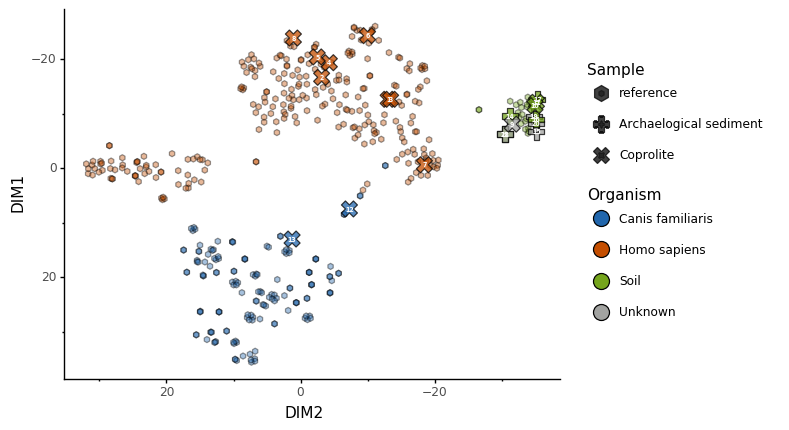

<ggplot: (-9223363298259161084)>

In [152]:
p = ggplot(sp_ref, aes(x='PC1',y='PC2')) + geom_point(aes(fill='organism', shape='ml'), stroke=0.5, color='black', size = 2, alpha=0.4)
p = p + geom_point(data = sp_pred, mapping=aes(x='PC1',y='PC2', fill='organism', shape='sample_type'), stroke=0.5, color='black', size = 6, alpha=0.75)
p = p + geom_text(data = sp_pred, mapping=aes(x='PC1',y='PC2', label='plot_id'), size = 4.5,fontweight = 'bold', color='white')
p = p + scale_shape_manual(name='Sample', values={'Coprolite':'X', 'Archaelogical sediment':'P', 'reference':'h'}) + theme_classic() + labs(x='DIM1',y='DIM2')
p = p + scale_fill_manual(name = 'Organism', values = {"Canis familiaris":"#2166ac","Homo sapiens":"#c44e00", "Soil":"#75a51c", 'Unknown':'#a2a3a1'})
p = p + guides(fill = guide_legend(override_aes = {'alpha':1}))
p = p + coord_flip() + scale_y_reverse() + scale_x_reverse()
p.save("results/figure4B.png", dpi=300)
p